<a href="https://colab.research.google.com/github/nneamakao/sales-prediction/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library Importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files
from sklearn.metrics import mean_absolute_error

## Graph Configuration

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

## Data Importation

In [3]:
uploaded = files.upload()

Saving train.csv to train (2).csv


In [4]:
sales = pd.read_csv('train.csv')
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Preparation

In [5]:
# Convert order date column to a datetime object
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [6]:
# Resample dataset to show total sales by month
monthly_sales = sales.resample('M', on = 'Order Date').sum()
monthly_sales.head()

,Row ID,Postal Code,Sales
Order Date,,,
2015-01-31,525678,6736108.0,28828.254
2015-02-28,467411,4650593.0,12588.484
2015-03-31,822337,8250689.0,54027.692
2015-04-30,529043,6742525.0,24710.016
2015-05-31,739544,7074424.0,29520.490


In [7]:
# Select only sales column
monthly_sales = monthly_sales[['Sales']]
monthly_sales.head()

,Sales
Order Date,
2015-01-31,28828.254
2015-02-28,12588.484
2015-03-31,54027.692
2015-04-30,24710.016
2015-05-31,29520.490


In [8]:
# Check number of months for which data is available
len(monthly_sales)

48

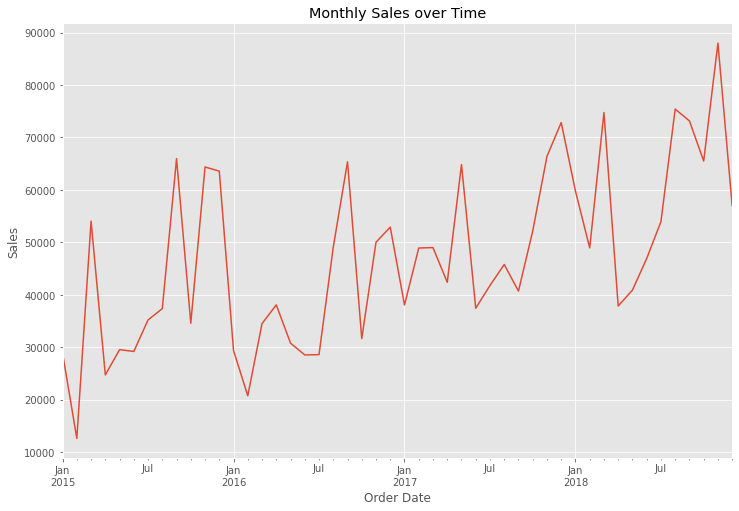

In [10]:
# Plot time series
monthly_sales['Sales'].plot()
plt.title('Monthly Sales over Time')
plt.ylabel('Sales')
plt.show();

In [11]:
# Make the order date a column again by resetting the index
monthly_sales.reset_index(inplace = True)
monthly_sales.head()

,Order Date,Sales
0,2015-01-31,28828.254
1,2015-02-28,12588.484
2,2015-03-31,54027.692
3,2015-04-30,24710.016
4,2015-05-31,29520.490


In [12]:
# Rename columns to ds and y, where ds is order date and y is sales
monthly_sales.columns = ['ds', 'y']
monthly_sales.head()

,ds,y
0,2015-01-31,28828.254
1,2015-02-28,12588.484
2,2015-03-31,54027.692
3,2015-04-30,24710.016
4,2015-05-31,29520.490


## Build Model

In [13]:
# Define and fit model 
model = Prophet(interval_width = 0.95, weekly_seasonality = True)
model.fit(monthly_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptguxwiax/azkpjab7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptguxwiax/lb5z9nd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87198', 'data', 'file=/tmp/tmptguxwiax/azkpjab7.json', 'init=/tmp/tmptguxwiax/lb5z9nd8.json', 'output', 'file=/tmp/tmptguxwiax/prophet_model83wxzipz/prophet_model-20221219125549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:55:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:55:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
# Define prediction period i.e. 12 months
forecast = model.make_future_dataframe(periods = 12, freq='M')
forecast.tail()

,ds
55,2019-08-31
56,2019-09-30
57,2019-10-31
58,2019-11-30
59,2019-12-31


In [15]:
# Make predictions for forecast period
forecast_prediction = model.predict(forecast)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2019-08-31,63803.883519,58732.936642,83858.945180,63799.277302,63808.922600,6628.255660,6628.255660,6628.255660,-1593.384714,-1593.384714,-1593.384714,8221.640373,8221.640373,8221.640373,0.0,0.0,0.0,70432.139179
56,2019-09-30,64319.864028,42627.000198,67090.301520,64314.261529,64326.077587,-8975.612612,-8975.612612,-8975.612612,-13329.906789,-13329.906789,-13329.906789,4354.294178,4354.294178,4354.294178,0.0,0.0,0.0,55344.251417
57,2019-10-31,64853.043888,37918.167119,63887.981320,64846.494076,64860.268195,-13811.235151,-13811.235151,-13811.235151,-1766.543823,-1766.543823,-1766.543823,-12044.691328,-12044.691328,-12044.691328,0.0,0.0,0.0,51041.808737
58,2019-11-30,65369.024397,83669.891492,108498.715026,65361.381209,65377.453678,30815.777487,30815.777487,30815.777487,-1593.384714,-1593.384714,-1593.384714,32409.162200,32409.162200,32409.162200,0.0,0.0,0.0,96184.801884
59,2019-12-31,65902.204257,70576.973347,95791.717016,65893.523380,65911.705953,16309.228399,16309.228399,16309.228399,-466.508967,-466.508967,-466.508967,16775.737366,16775.737366,16775.737366,0.0,0.0,0.0,82211.432656


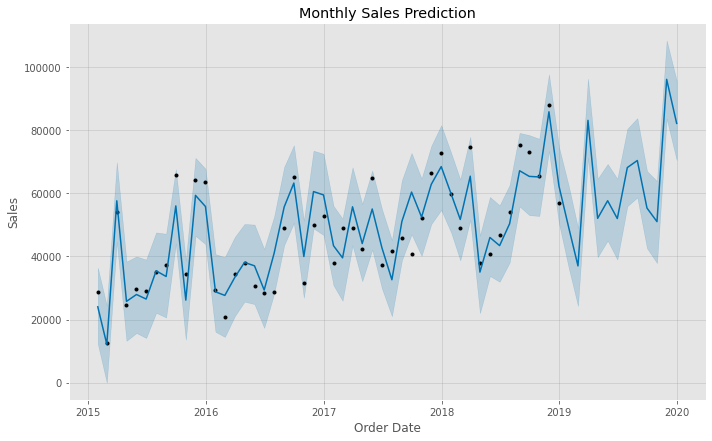

In [17]:
# plot forecast
model.plot(forecast_prediction)
plt.title('Monthly Sales Prediction')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show();

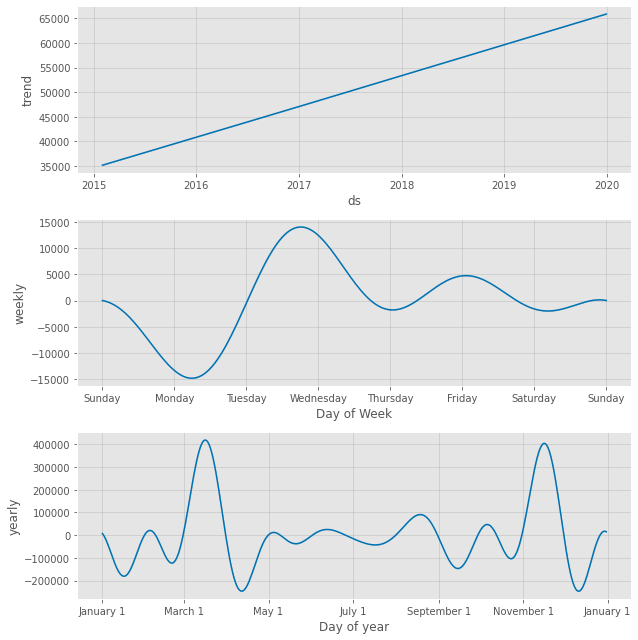

In [18]:
# Plot forecast components
model.plot_components(forecast_prediction)
plt.show();

## Evaluate

In [19]:
# Create test dataset
test = monthly_sales

In [20]:
# Calculate MAE between actual values and average sales value
y_true = monthly_sales['y'].values
y_mean = monthly_sales['y'].mean()
y_pred_baseline = [y_mean] * len(monthly_sales)
mae_baseline = mean_absolute_error(y_true, y_pred_baseline)
print('Baseline mean absolute error: {:.3f}'.format(mae_baseline))

Baseline mean absolute error: 13839.077


In [21]:
# Calculate MAE between actual and predicted values 
y_pred = forecast_prediction['yhat'].iloc[: len(test)].values
mae = mean_absolute_error(y_true, y_pred)
print('Mean absolute error: {:.3f}'.format(mae))

Mean absolute error: 5069.511


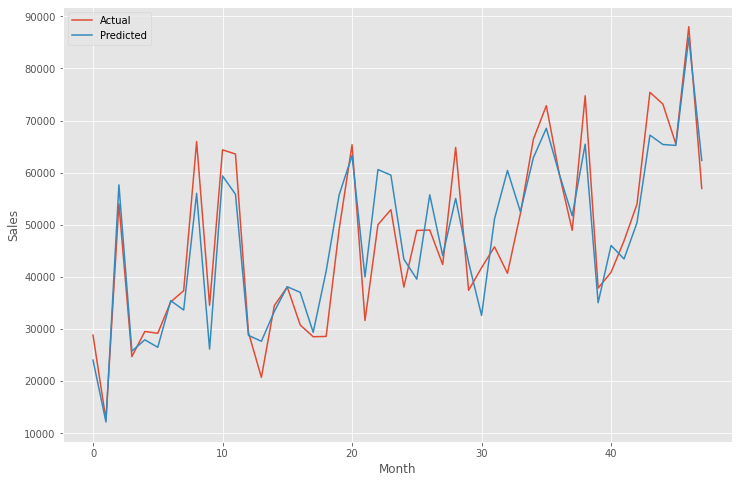

In [23]:
# Plot predicted and actual sales values
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show();